In [1]:
import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import tensorflow as tf
import numpy as np
import cv2

In [5]:
# img = cv2.imread('HIPPO/bob-brewer-YSPHg0YjxA8-unsplash.jpg')
img = cv2.imread('C:/Users/Billy Ndegwah/Downloads/Hippos_N_Lions/train/HIPPO/digitalarbyter--7LgynM8JD4-unsplash.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hippo = img.copy()

def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img)

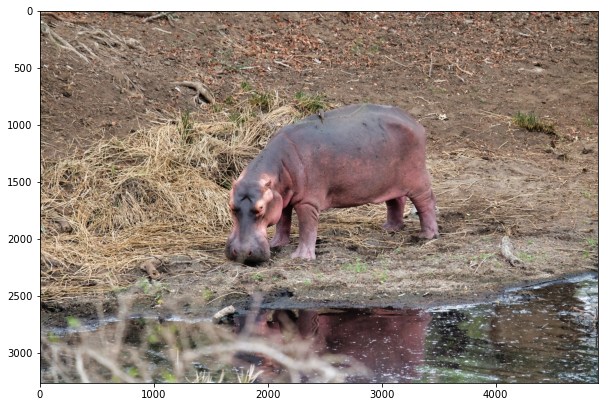

In [6]:
display(hippo)

In [7]:
hippo.shape

(3264, 4896, 3)

In [8]:
hippo.max()

255

In [10]:
# convert the image array to binary values.
example = hippo/hippo.max()
example.max()

1.0

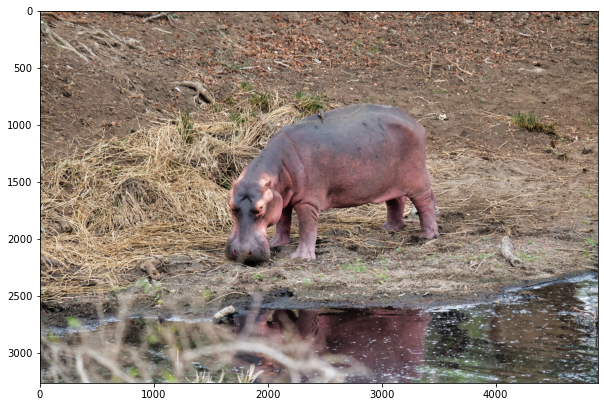

In [11]:
display(example)

In [12]:
image_gen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                         rotation_range=90,
                                                         width_shift_range=8,
                                                         height_shift_range=10,
                                                         shear_range=0.4,
                                                         zoom_range=0.6,
                                                         channel_shift_range=0.3,
                                                         fill_mode='nearest',
                                                         horizontal_flip=True,
                                                         rescale=8,
                                                         data_format='channels_last')

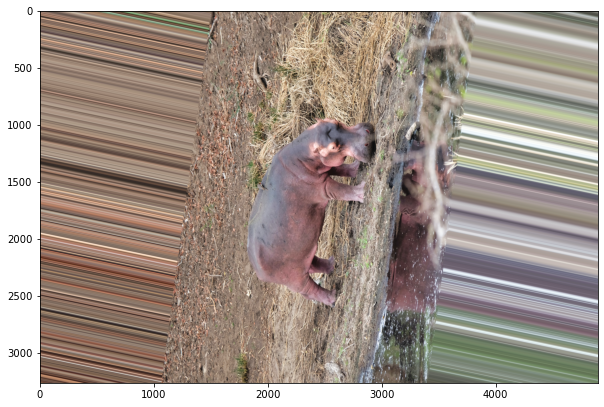

In [15]:
display(image_gen.random_transform(example))

In [ ]:
example.shape

In [46]:
image_shape = (150,150,3)

In [51]:
batch_size = 32

train_gen = image_gen.flow_from_directory('Hippos_N_Lions/train',
                                         target_size=image_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 232 images belonging to 2 classes.


In [52]:
test_gen = image_gen.flow_from_directory('Hippos_N_Lions/test',
                                         target_size=image_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')


Found 171 images belonging to 2 classes.


In [65]:
train_gen.class_indices

{'HIPPO': 0, 'LION': 1}

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation

In [66]:
hippo_net = Sequential()

hippo_net.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
hippo_net.add(MaxPooling2D(pool_size=(2, 2)))

hippo_net.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
hippo_net.add(MaxPooling2D(pool_size=(2, 2)))

hippo_net.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
hippo_net.add(MaxPooling2D(pool_size=(2, 2)))

hippo_net.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
hippo_net.add(MaxPooling2D(pool_size=(2, 2)))


hippo_net.add(Flatten())

hippo_net.add(Dense(128))
hippo_net.add(Activation('relu'))
hippo_net.add(Dropout(0.5))
hippo_net.add(Dense(1))
hippo_net.add(Activation('sigmoid'))

hippo_net.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [67]:
hippo_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = hippo_net.fit_generator(train_gen,
                                  epochs=50,                                  
                                  validation_data=test_gen)

Epoch 1/50
5/8 [=================>............] - ETA: 19:30 - loss: 7.9734 - acc: 0.5000